# Project Overview
Understanding how countries cluster based on socio-economic factors can reveal hidden patterns of development, inequality, and regional disparities. This information can be valuable for policymakers, NGOs, and researchers working to address global challenges. 

This project will identify distinct groups of countries with similar socio-economic profiles, allowing us to investigate which factors are most influential in determining these groupings. We will explore potential correlations between variables like GDP, health expenditure, and education levels to gain a deeper understanding of the complex interplay between these factors.

# Datasets
The dataset, sourced from Kaggle, contains a variety of socio-economic and health indicators for a range of countries. Here is the link to the dataset: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data/data

Objective: 
To categorise the countries using socio-economic and health factors that determine the overall development of the country


# Methodology

This project will follow a standard K-Means clustering workflow, with specific steps tailored to our dataset and objectives. Here's a breakdown:

**1. Data Loading and Preparation** 

* We'll begin by loading the dataset into our Jupyter Notebook using the Pandas library. 
* Initial data cleaning will be performed to handle missing values, correct data types, and address any inconsistencies that might affect our analysis.

**2. Exploratory Data Analysis (EDA)**

* **Univariate Analysis:** We'll examine the distribution of each variable using histograms, box plots, and summary statistics to understand their range, central tendency, and potential outliers.
* **Bivariate Analysis:**  We'll investigate relationships between pairs of variables using scatter plots, correlation matrices, and other visualization tools to identify correlations and potential multicollinearity.
* **Dimensionality Reduction (Optional):** If the dataset has a high number of variables, we might consider dimensionality reduction techniques like Principal Component Analysis (PCA) to simplify the data while preserving crucial information.

**3. Feature Scaling**

* K-Means clustering is sensitive to the scale of variables. To ensure each feature contributes equally to the distance calculations, we'll standardize or normalize the data.

**4. Determining the Optimal Number of Clusters**

* To find the best number of clusters (k), we'll employ techniques like the Elbow method and the Silhouette score. These methods help us identify the 'k' value that best captures the underlying structure of the data.

**5. K-Means Clustering**

* With the optimal 'k' determined, we'll apply the K-Means algorithm to group the countries into clusters.

**6. Cluster Analysis and Interpretation**

* We'll analyze the characteristics of each cluster by examining the mean values of the variables for the countries within each group. This will help us understand the defining features of each cluster and assign meaningful labels.
* **Visualization:** We'll use scatter plots and other visualization methods to visualize the clusters and observe how the countries are grouped based on their socio-eth indicators.

# EDA
Lets us first view the data dictionary and the data

In [3]:
import pandas as pd

data_dictionary = pd.read_csv("data-dictionary.csv")
print(data_dictionary)

  Column Name                                        Description
0     country                                Name of the country
1  child_mort  Death of children under 5 years of age per 100...
2     exports  Exports of goods and services per capita. Give...
3      health  Total health spending per capita. Given as %ag...
4     imports  Imports of goods and services per capita. Give...
5      Income                              Net income per person
6   Inflation  The measurement of the annual growth rate of t...
7  life_expec  The average number of years a new born child w...
8   total_fer  The number of children that would be born to e...
9        gdpp  The GDP per capita. Calculated as the Total GD...


In [4]:
df = pd.read_csv("Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Their seems to be no incomplete data and the variables are in the correct data type.

In [6]:
# lets index the country
df.set_index('country', inplace=True)
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


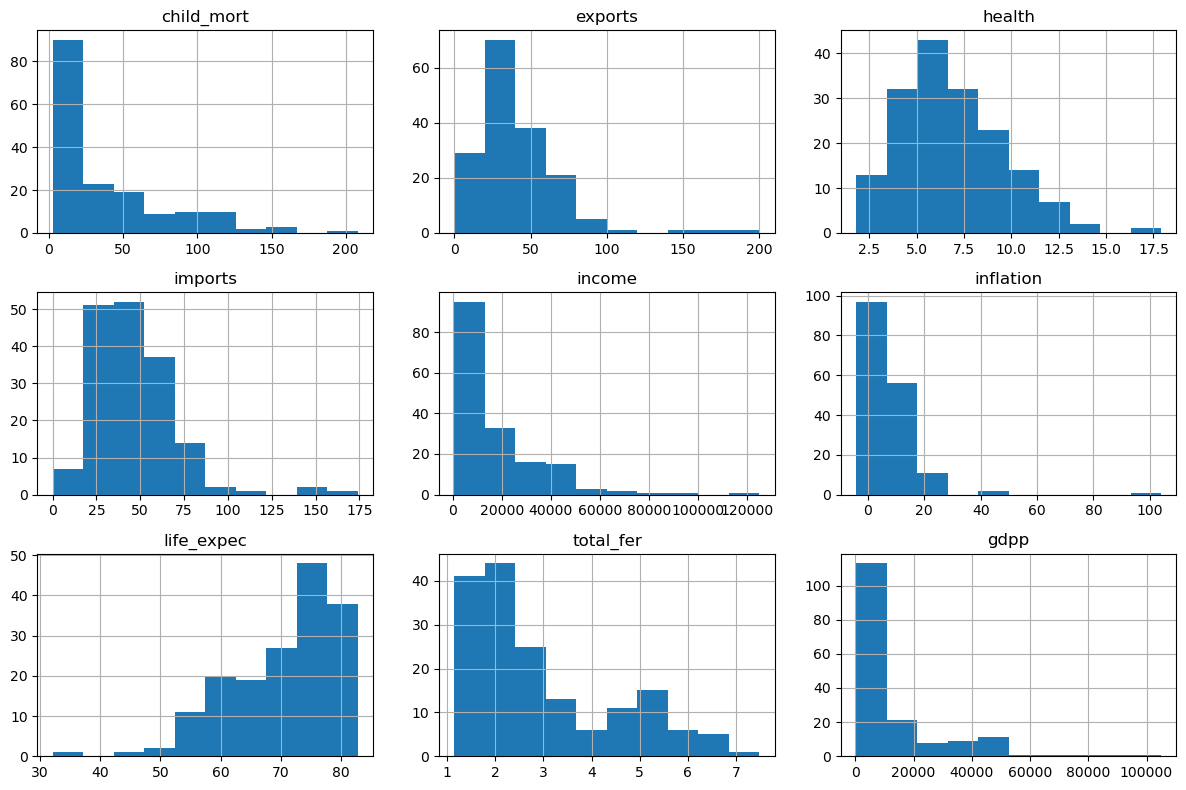

In [7]:
# let us view the distribution of the features
import matplotlib.pyplot as plt

# Plot histograms for all numerical columns
df.hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

The histograms reveal diverse distributions across the socio-economic variables. Some like child_mort and gdpp show a right-skewed distribution with a concentration of countries at lower values and a long tail towards higher values. Others such as health and life_expec exhibit a more bell-shaped distribution.  
total_fer appears to be left-skewed, with more countries having lower fertility rates. These variations highlight the inequalities and different levels of development across the countries in the dataset.

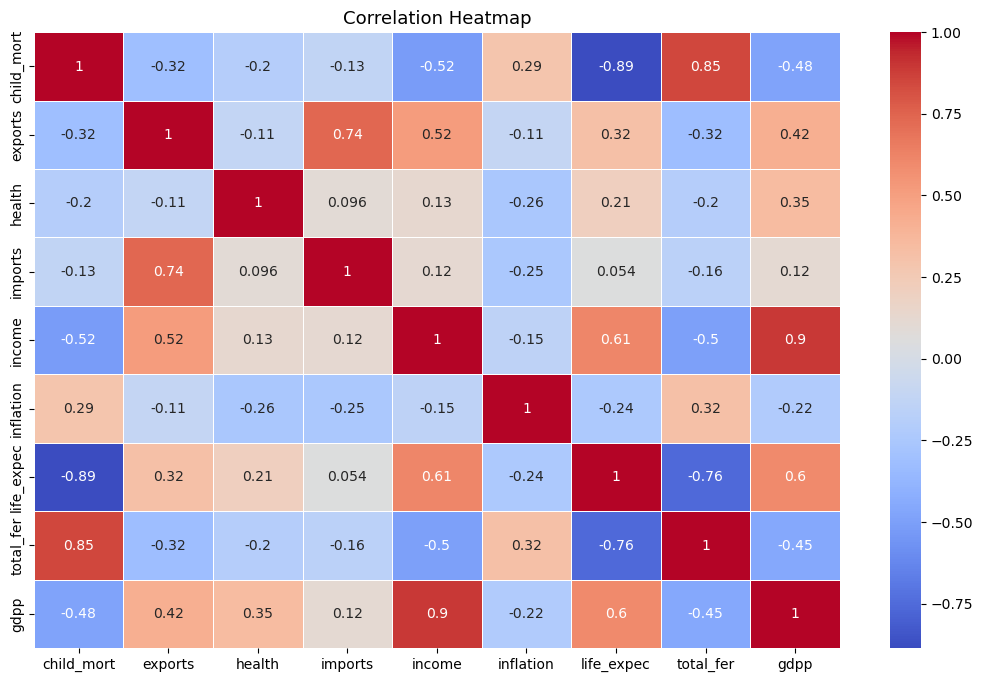

In [8]:
# lets find the correlation between the features
import seaborn as sns
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap', fontdict={'fontsize': 13})
plt.show() 

Their is a Strong positive correlations exist between income and gdpp, and between imports and exports, while child_mort and life_expec show a strong negative correlation. These relationships highlight the interconnected nature of these variables and suggest that improvements in areas like income and health can have cascading positive effects on other aspects of a nation's development.  

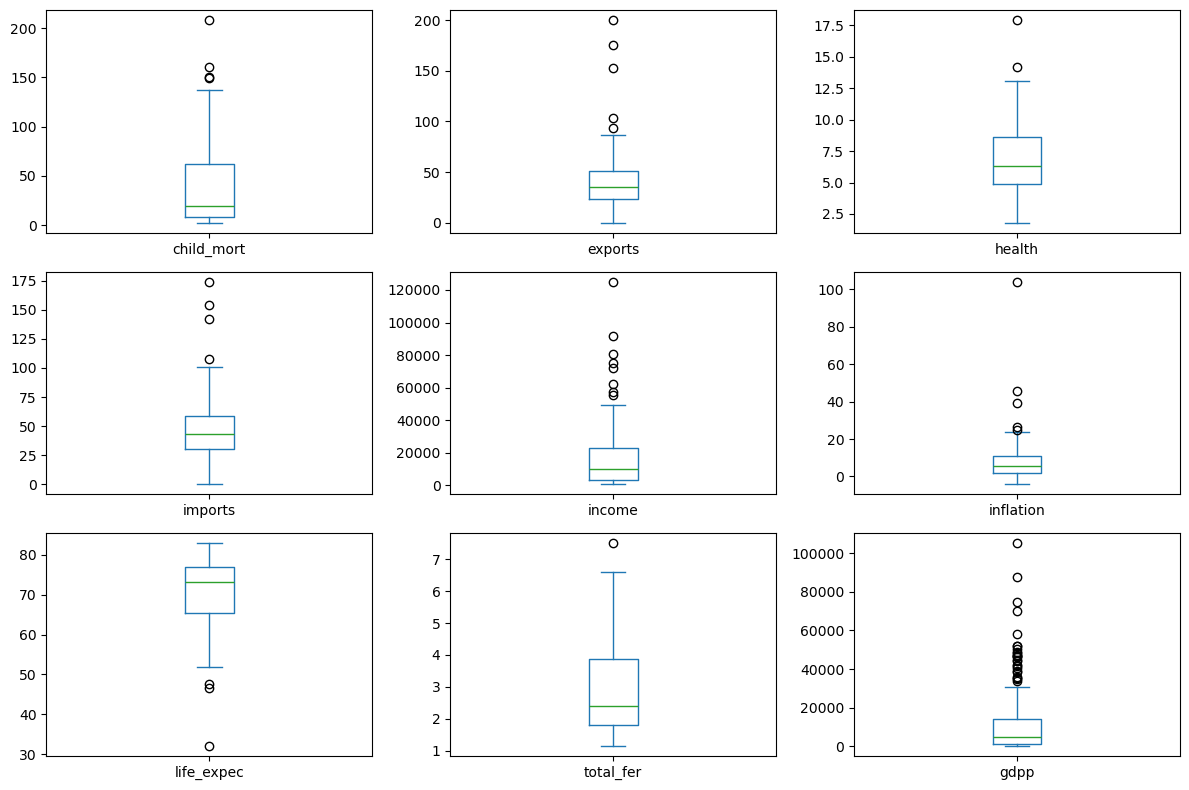

In [9]:
# let us see if their is outliers
df.plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

They are some outliers but thsi is expected as some countries will have extreme values compared to the rest of the dataset.

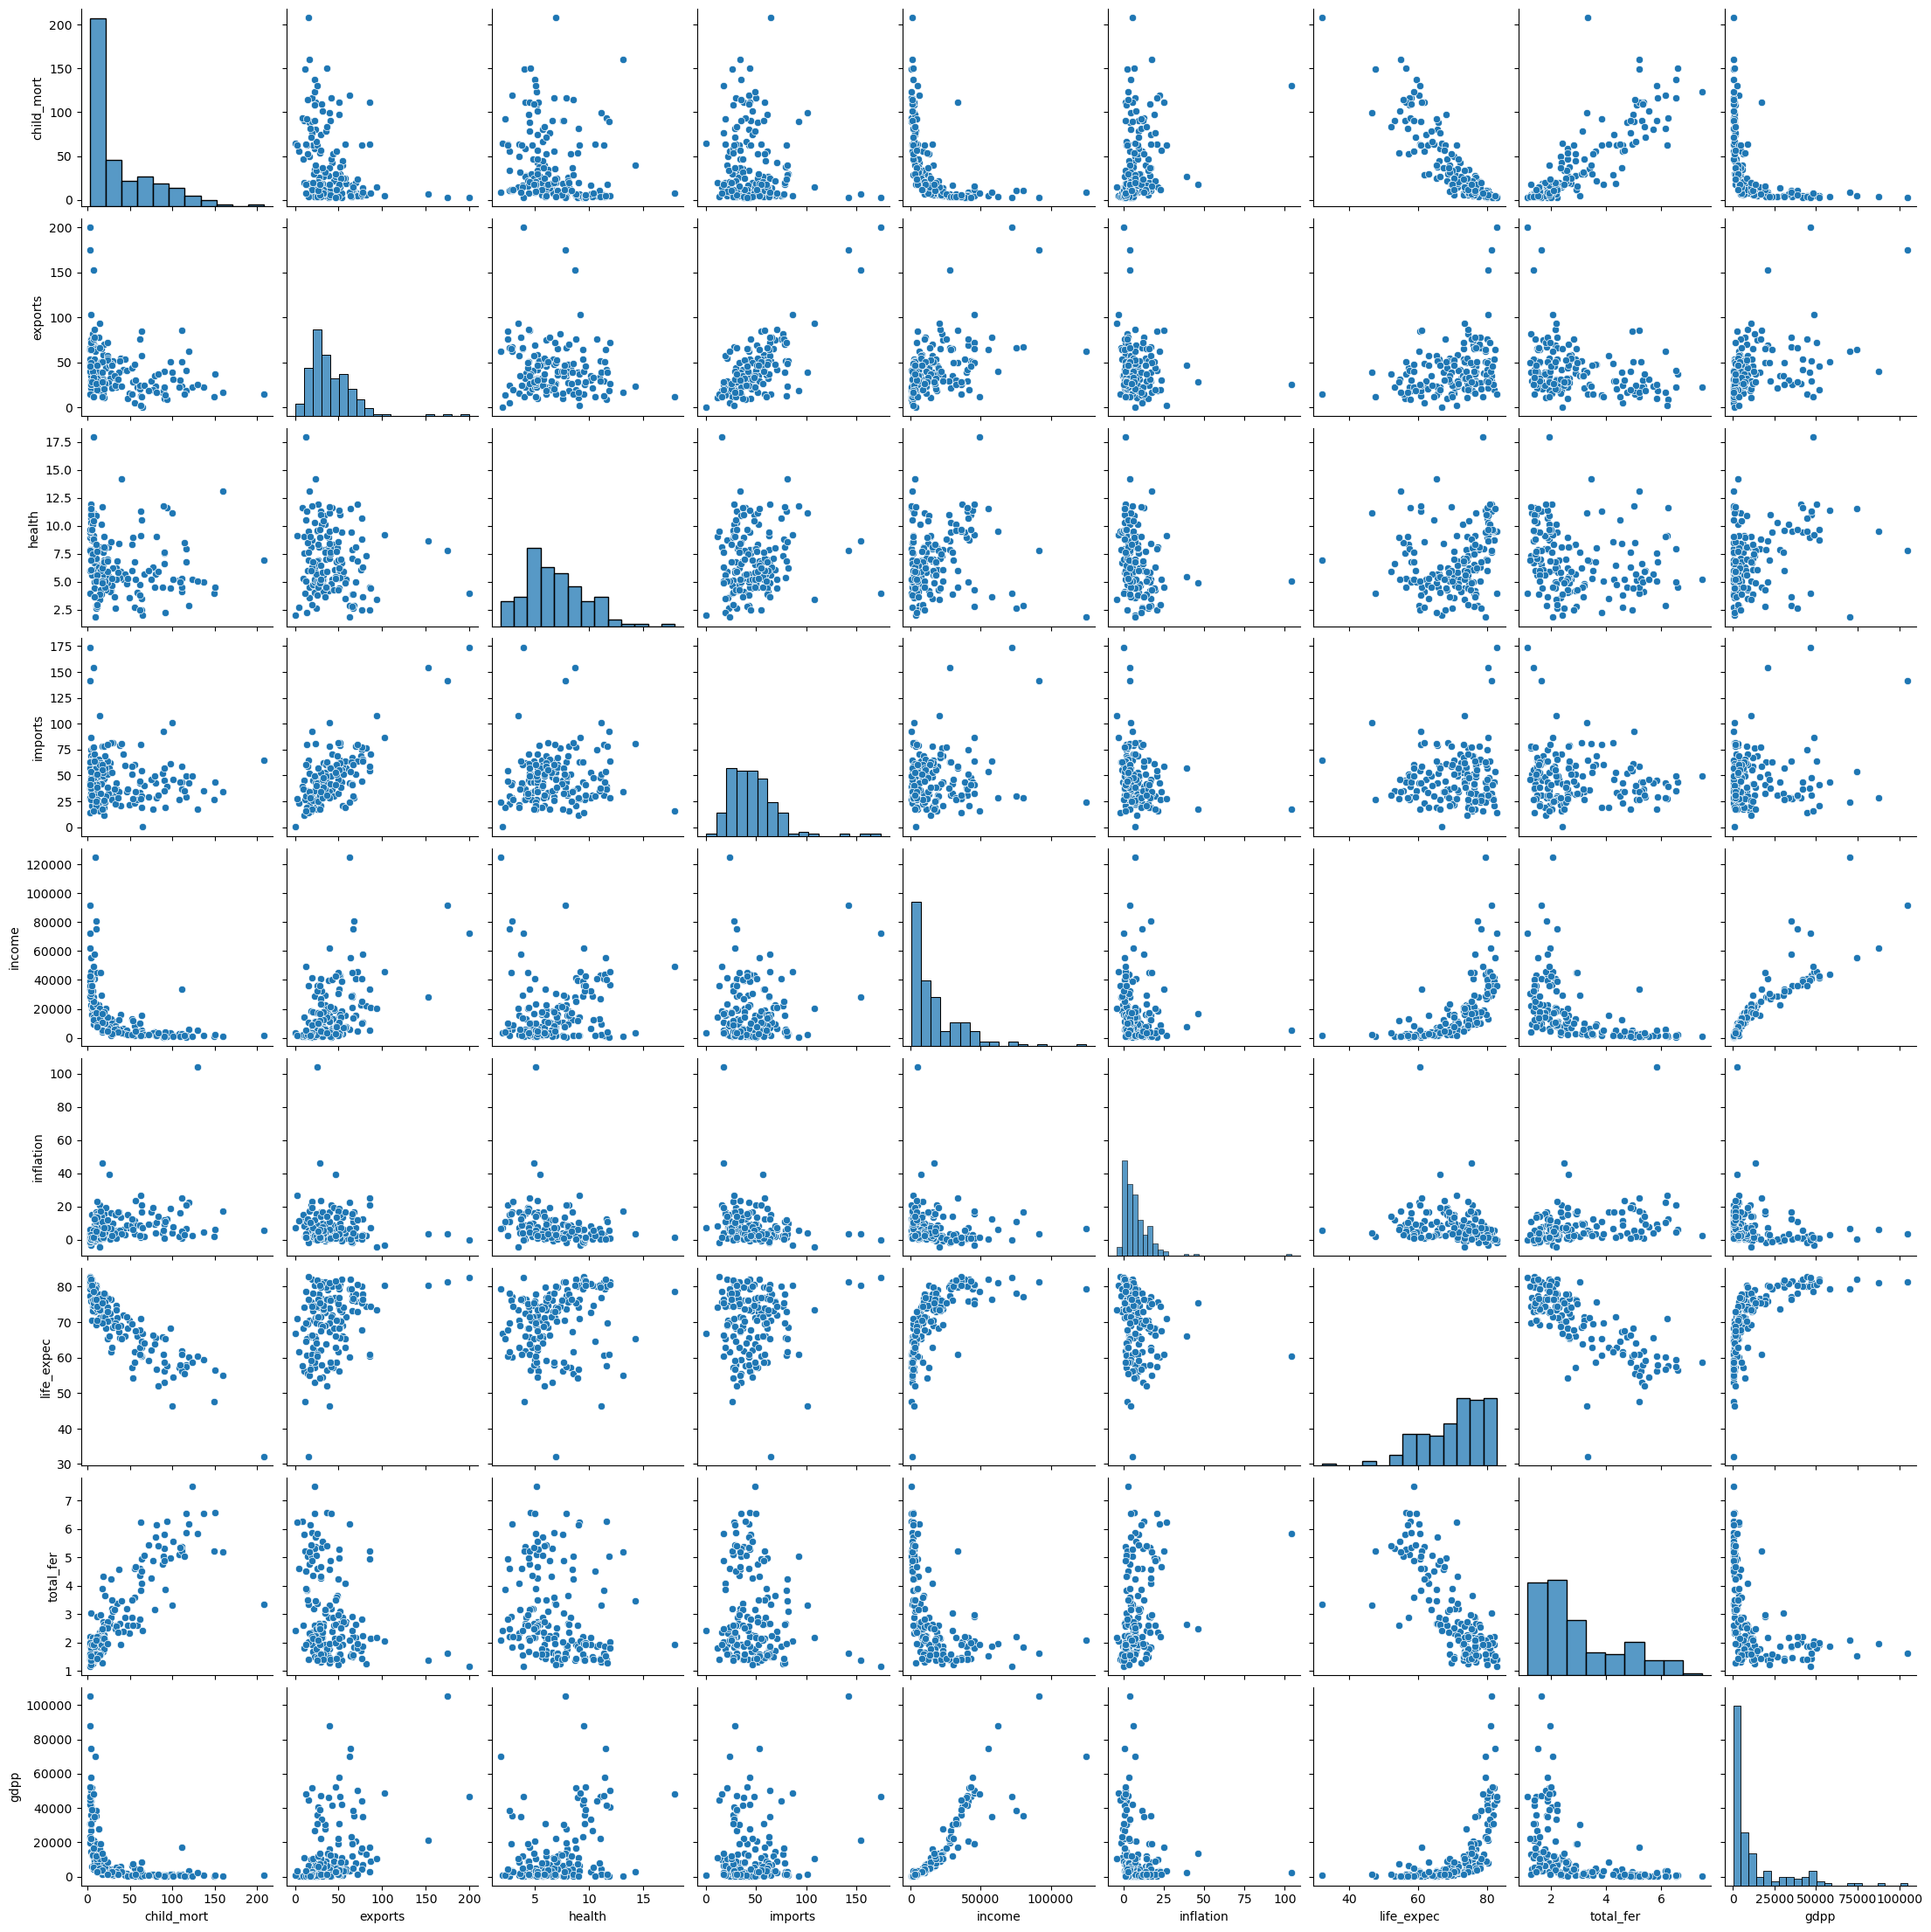

In [10]:
sns.pairplot(df)
plt.show()

# Model Development

This section outlines the steps involved in building and evaluating our K-Means clustering model:

**1. Feature Scaling**

* Before applying K-Means, we'll scale our features to ensure that all variables contribute equally to the distance calculations. This prevents features with larger scales from dominating the clustering process.
* We'll use either standardization (Z-score normalization) or Min-Max scaling, depending on the characteristics of our data.

**2. Choosing the Number of Clusters**

* Determining the optimal number of clusters (k) is crucial for meaningful results. We'll use the following methods to guide our choice:
    * **Elbow Method:** We'll plot the within-cluster sum of squares (WCSS) against different values of k. The "elbow" point in this plot suggests a good value for k, where adding more clusters doesn't significantly reduce the WCSS.
    * **Silhouette Score:** This metric measures how similar an object is to its own cluster compared to other clusters. We'll calculate the average silhouette score for different values of k and choose the one that maximizes this score.

**3. K-Means Clustering**

* Once we've determined the optimal k, we'll apply the K-Means algorithm to our scaled data. This will partition the countries into k clusters based on their socio-economic and health indicators.

**4. Cluster Visualization**

* To understand the formed clusters, we'll visualize them using scatter plots or other appropriate techniques. This will help us observe how the countries are grouped and identify any patterns or outliers.

**5. Cluster Evaluation**

* We'll evaluate the quality of our clusters by analyzing the characteristics of each cluster. This might involve:
    * Calculating descriptive statistics (mean, median, standard deviation) for each variable within each cluster.
    * Identifying the key features that distinguish the clusters from one another.
    * Assessing the overall separation and compactness of the clusters.

In [11]:
# import the libraries
from sklearn.preprocessing import StandardScaler

# scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
scaled_df.head() 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


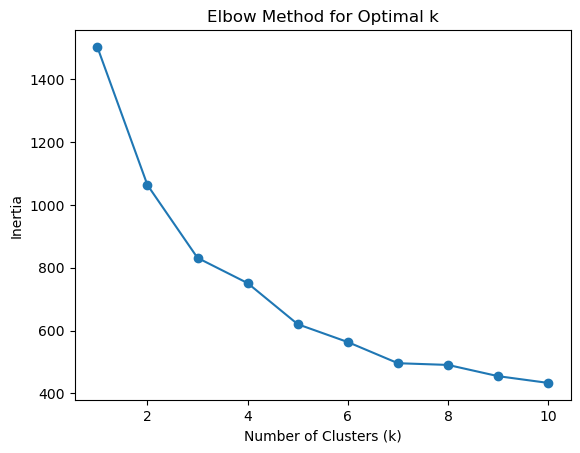

In [12]:
# no. of clusters
# elbow method
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

inertia = []
# Try KMeans for different k values (e.g., 1 to 10)
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show() 

From the Plot, we can see the elbow point occurs around k = 4 or k = 5, indicating that increasing the number of clusters beyond this point yields diminishing returns in terms of improving inertia.

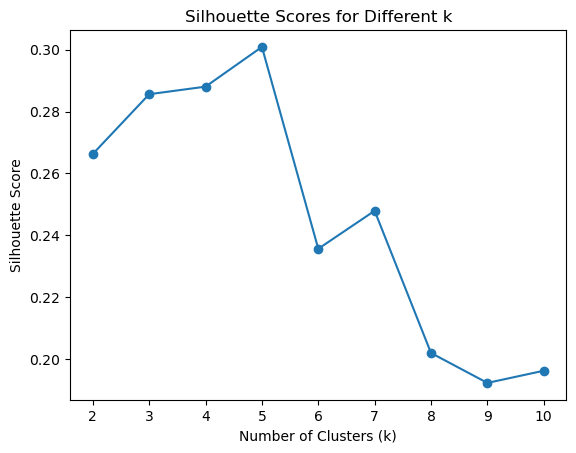

In [13]:
# Silhouette Score
from sklearn.metrics import silhouette_score

# Compute silhouette scores for k = 2 to k = 10
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.show()

In this plot we clearly see k = 5 shows the highest silhouette score suggesting that the clustering structure is optimal for 5 clusters. 

In [14]:
# now we will use K = 5
optimal_k = 5

# Apply K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster k = 5'] = kmeans.fit_predict(scaled_df)

# Preview the data with cluster labels
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster k = 5
country,,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


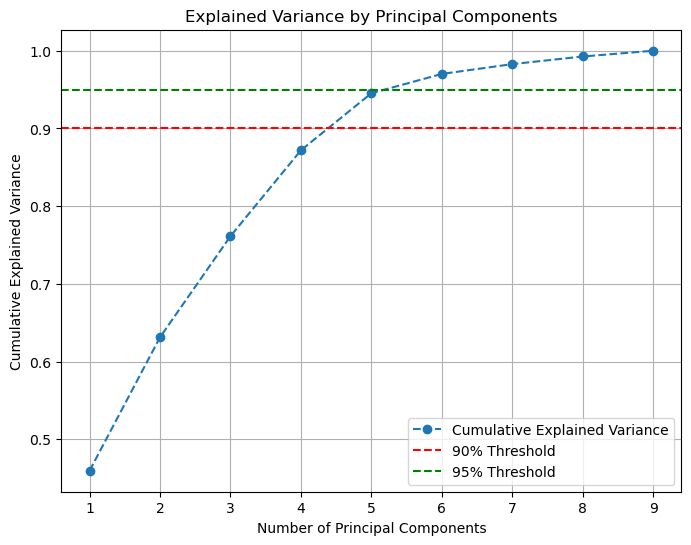

In [15]:
from sklearn.decomposition import PCA
# Apply PCA and reduce the dimensions of the scaled data
pca = PCA(n_components=None)  # n_components=None means we will retain all components initially
pca.fit(scaled_features)

# Check how much variance is explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance to find out how many components to keep
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--', label='Cumulative Explained Variance')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Threshold')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Threshold')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))
plt.legend()
plt.grid()
plt.show()

We can see the 90% and 95% line, so we can say that the variance is explained by the first 5 principal components

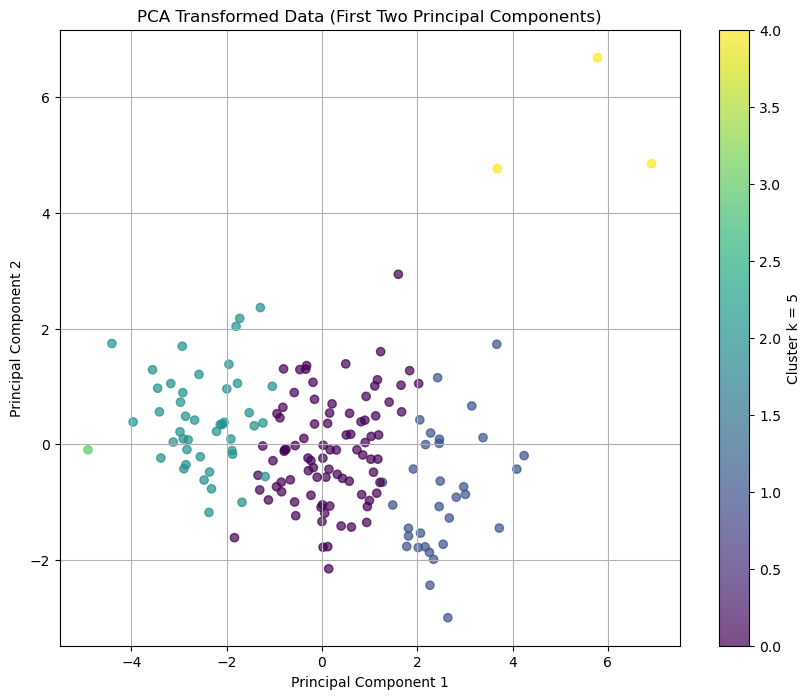

In [17]:
pca = PCA(n_components=5)
pca_transformed_data = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 8))
# Use a color map to represent clusters if available
plt.scatter(pca_transformed_data[:, 0], pca_transformed_data[:, 1], 
            c=df[ 'Cluster k = 5'],  # Uncomment if you have cluster labels
            cmap='viridis',  # Change color map as desired
            alpha=0.7)  # Increase transparency

plt.title('PCA Transformed Data (First Two Principal Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label= 'Cluster k = 5') 
plt.grid()
plt.show()

# Evaluation

In [18]:
# evaluate our model
from sklearn.metrics import silhouette_score, davies_bouldin_score

silhouette_avg = silhouette_score(scaled_features, kmeans.labels_)
db_index = davies_bouldin_score(scaled_features, kmeans.labels_)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {db_index}')

Silhouette Score: 0.30088229124112015
Davies-Bouldin Index: 0.8671489714172458


In evaluating the K-Means clustering model using a dataset of socio-economic indicators, the Silhouette Score was calculated at 0.3009, indicating moderate separation between clusters. The Davies-Bouldin Index, at 0.8671suggests relatively well-separated clusters although there is room for improvement. These metrics collectively indicate that while the clustering model captures some distinct groupings, further refinement may enhance its performance. lets review the clsuters

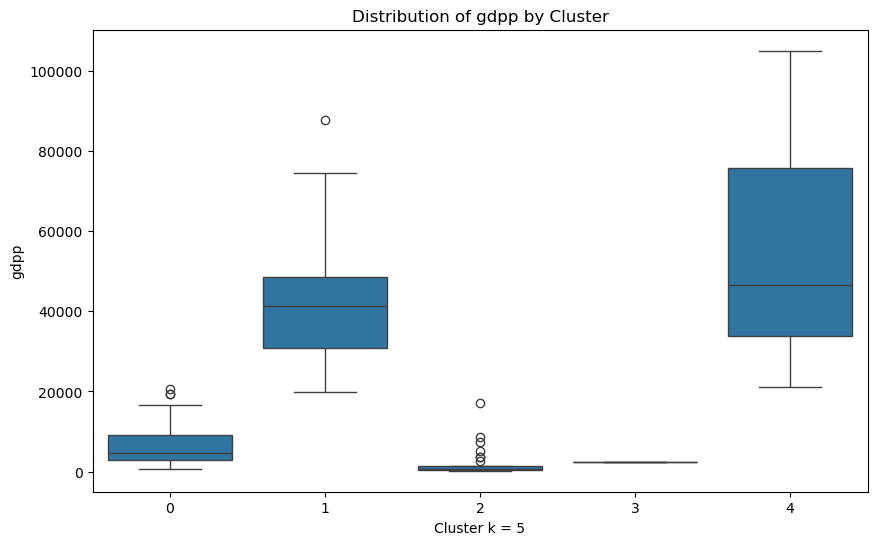

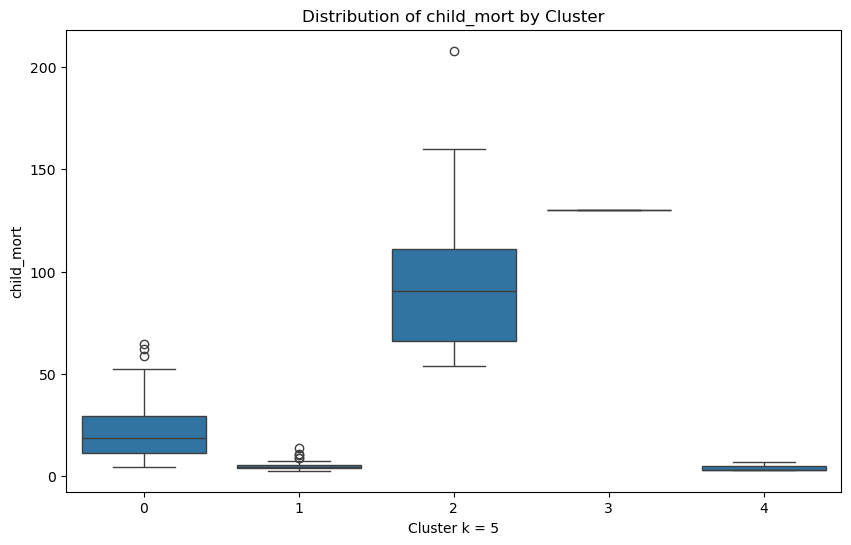

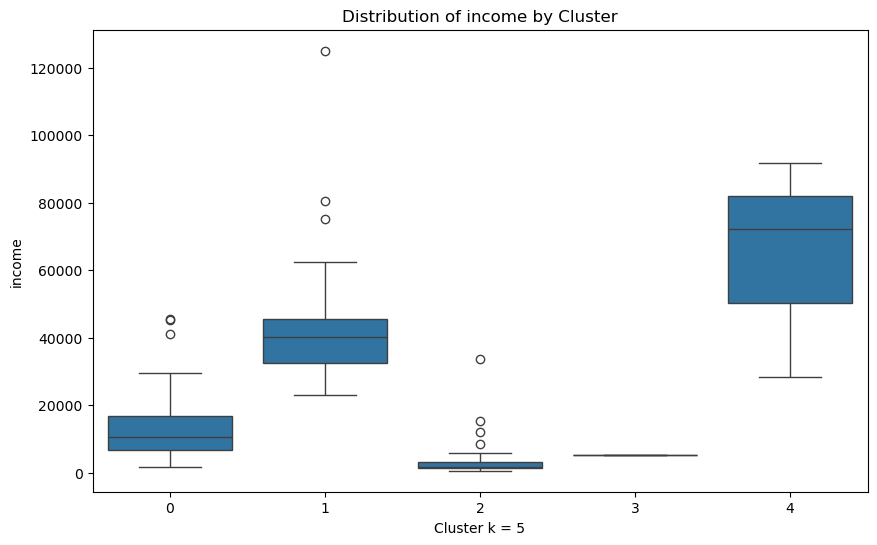

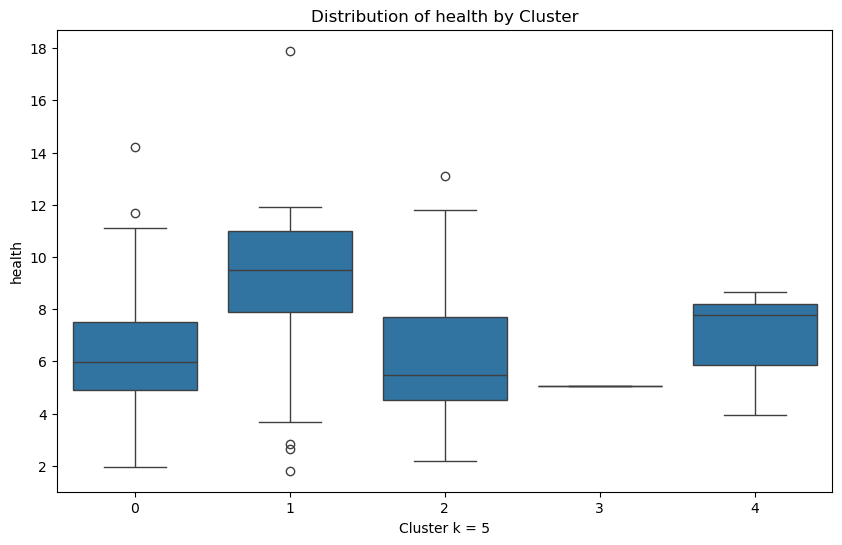

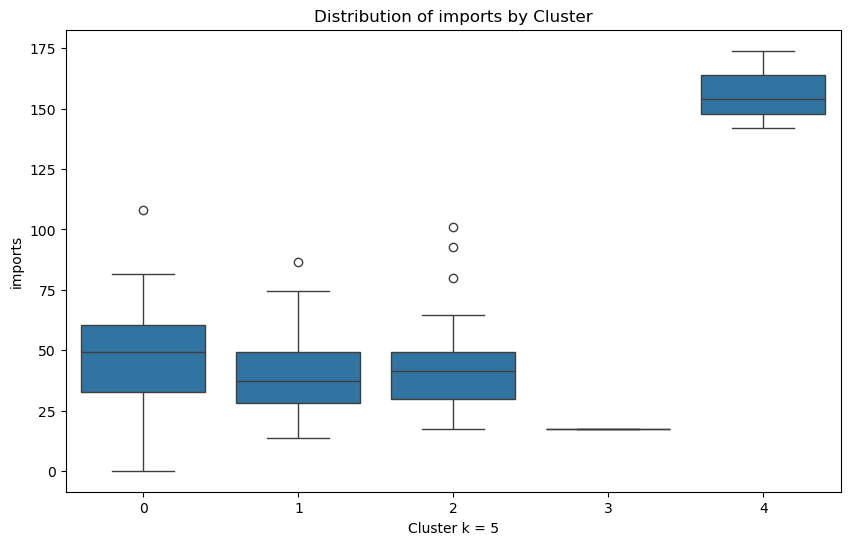

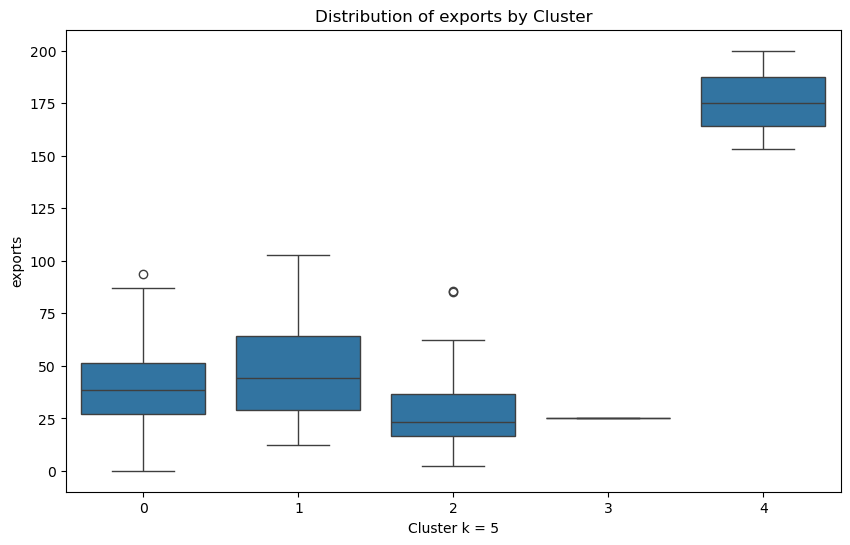

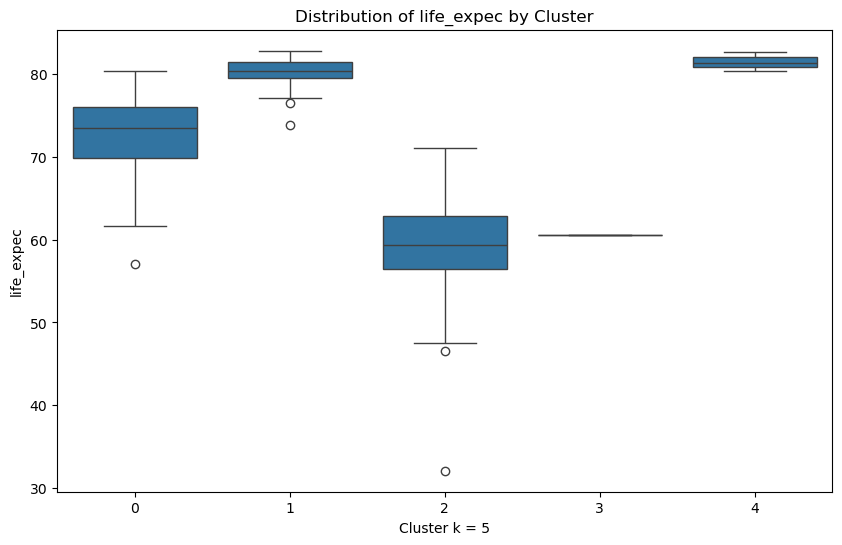

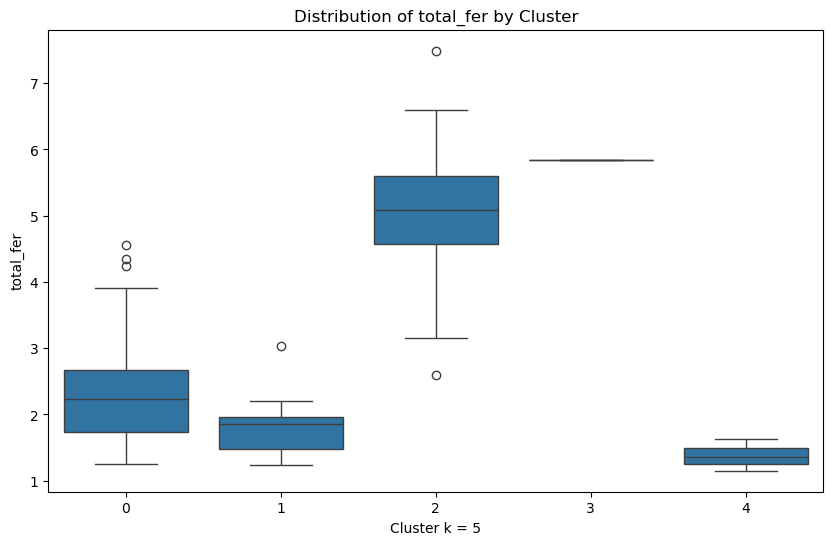

In [19]:
# Plotting boxplots for key features
features_to_plot = ['gdpp', 'child_mort', 'income', 'health', 'imports', 'exports', 'life_expec', 'total_fer']

for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x= 'Cluster k = 5', y=feature, data=df.reset_index())
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel( 'Cluster k = 5')
    plt.ylabel(feature)
    plt.show()

From observing the features and clusters we can say that for a Highly developed countries: with the highest values in Income, Life Expectancy, GDP per capita, and lowest values in Child Mortality and Total Fertility. and Least developed countries: with by far the highest values in Child Mortality and Total Fertility as well as the smallest values in Income, Life Expectancy, and GDP per capitaL. Using this logic we can create simple map to classify the clusters.

In [21]:
development_levels = {
    4: 'Highly Developed',          
    1: 'Developed',
    0: 'Moderately Developed',
    3: 'Developing', 
    2: 'Least Developed'
}

df['Development Level'] = df[ 'Cluster k = 5'].map(development_levels) 

In [24]:
# Print countries grouped by development level
development_grouped = df.groupby('Development Level').apply(lambda x: x.index.tolist()).to_dict()

print("Countries grouped by Development Level:\n")  # Added newline for better readability
for level, countries in development_grouped.items():
    print(f"{level}:")  # Correct f-string formatting
    print(", ".join(countries))  # Correct way to join strings with a comma and space
    print("\n")

Countries grouped by Development Level:

Developed:
Australia, Austria, Bahamas, Belgium, Brunei, Canada, Cyprus, Czech Republic, Denmark, Finland, France, Germany, Greece, Iceland, Ireland, Israel, Italy, Japan, Kuwait, Netherlands, New Zealand, Norway, Portugal, Qatar, Slovenia, South Korea, Spain, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States


Developing:
Nigeria


Highly Developed:
Luxembourg, Malta, Singapore


Least Developed:
Afghanistan, Angola, Benin, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Pakistan, Rwanda, Senegal, Sierra Leone, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia


Moderately Developed:
Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerb

After printing out our list of countries we see that our model needs more refinment. so lets try with K = 4. if our results would be more realistic to the current world standing.

In [25]:
k = 4

# Fit the K-Means model
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster k = 4'] = kmeans.fit_predict(scaled_df)  # Assuming df_scaled is your scaled DataFrame

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_

silhouette_avg = silhouette_score(scaled_df, df['Cluster k = 4'])
davies_bouldin = davies_bouldin_score(scaled_df, df['Cluster k = 4'])

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Silhouette Score: 0.2880471307804802
Davies-Bouldin Index: 0.9982610375914969


Overall clustering with k = 5 and k = 4 as indicated by both the higher silhouette score and the lower Davies-Bouldin index. This suggests that the five clusters we found are more distinct and better defined than those formed with four clusters.

# DBSCAN
let us compare our k means with dbcan

In [26]:
from sklearn.cluster import DBSCAN
# DBSCAN parameters
eps = 1.0  
min_samples = 3  

# Fit DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(scaled_df)
print(dbscan_labels)

[ 0  1 -1 -1  1 -1  1  2  2 -1  1 -1 -1  1 -1 -1  1  3  1  1  1 -1  1 -1
  1  3 -1  1  3  2  1 -1  5  1  1  1  4 -1 -1  1  0  1  1  1  2  1  1  1
  1 -1 -1  1  1  2  2 -1  4  1  2 -1  2  1  1  0  3  1 -1  1  2 -1 -1  1
 -1 -1 -1  2  1  2 -1 -1  4 -1 -1  1 -1  1  1 -1 -1 -1  1 -1  1  4  0 -1
  1  5 -1 -1  1 -1 -1 -1  1  1  0 -1 -1 -1 -1  2  5 -1 -1 -1 -1  1  1  1
  1  1  2 -1  1  1 -1 -1 -1  4  1 -1 -1 -1  1  1 -1 -1  1  2 -1  1 -1  1
  2 -1 -1  0 -1 -1 -1 -1  1  1 -1  0 -1 -1  2 -1  1 -1  1 -1 -1 -1  0]


In [29]:
# Calculate Silhouette Score and Davies-Bouldin Index
silhouette = silhouette_score(scaled_df, dbscan_labels)
davies_bouldin = davies_bouldin_score(scaled_df, dbscan_labels)

print(f'DBSCAN Silhouette Score: {silhouette}') 
print(f'DBSCAN Davies-Bouldin Index: {davies_bouldin}')

DBSCAN Silhouette Score: 0.011714126637591612
DBSCAN Davies-Bouldin Index: 1.8708942481791966


Based on the clustering performance, K-Means (with k=5) clearly outperforms DBSCAN on this dataset. The K-Means model achieves a higher Silhouette Score (0.30 vs. 0.01) and a lower Davies-Bouldin Index (0.87 vs. 1.87), indicating better cluster separation and compactness. DBSCAN struggled to cluster the data effectively, resulting in a poor clustering structure with many points classified as noise. Therefore, K-Means provides more meaningful and well-defined clusters, making it the better algorithm for this analysis.